In [2]:
pip install -q -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 778.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 28.6 MB/s eta 0:00:00


In [17]:
!pip install open3d


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.8
    Uninstalling widgetsnbextension-3.6.8:
      Successfully uninstalled widgetsnbextension-3.6.8
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
from transformers import pipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
checkpoint = "depth-anything/Depth-Anything-V2-base-hf"
pipe = pipeline("depth-estimation", model=checkpoint, device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


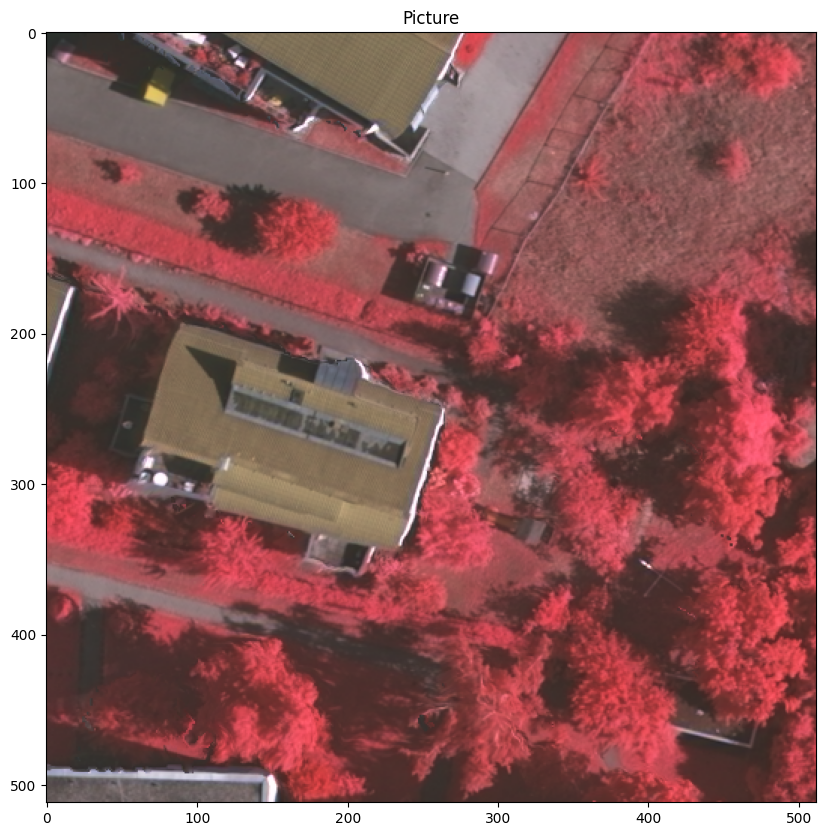

In [3]:
from PIL import Image
import requests

image = Image.open("/content/output_image (1).png")
image

In [4]:
predictions = pipe(image)

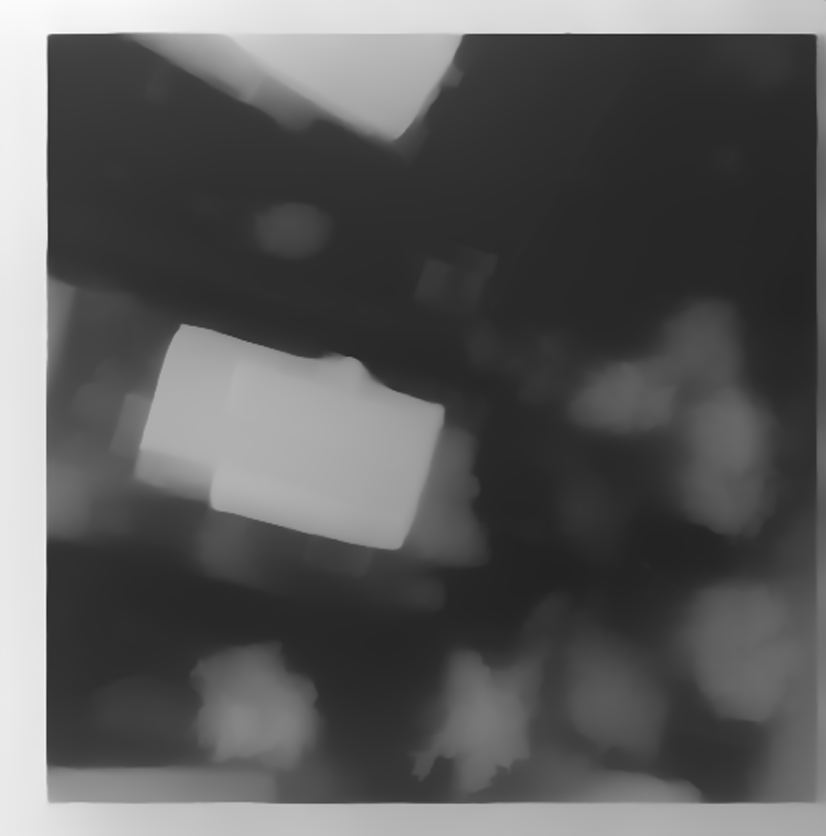

In [5]:
predictions["depth"]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import torch
import open3d as o3d

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

depth_image = predictions["depth"]


depth_array = np.array(depth_image)

if depth_array.max() > 1:
    depth_array = depth_array / np.max(depth_array)

colormap = cm.get_cmap('viridis')
colored_depth_array = colormap(depth_array)

colored_depth_image = Image.fromarray((colored_depth_array[:, :, :3] * 255).astype(np.uint8))

output_path = '/content/colored_depth_image.png'
colored_depth_image.save(output_path)



Imagen de alturas con colormap guardada en /content/colored_depth_image.png


<ipython-input-7-0591243660d2>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


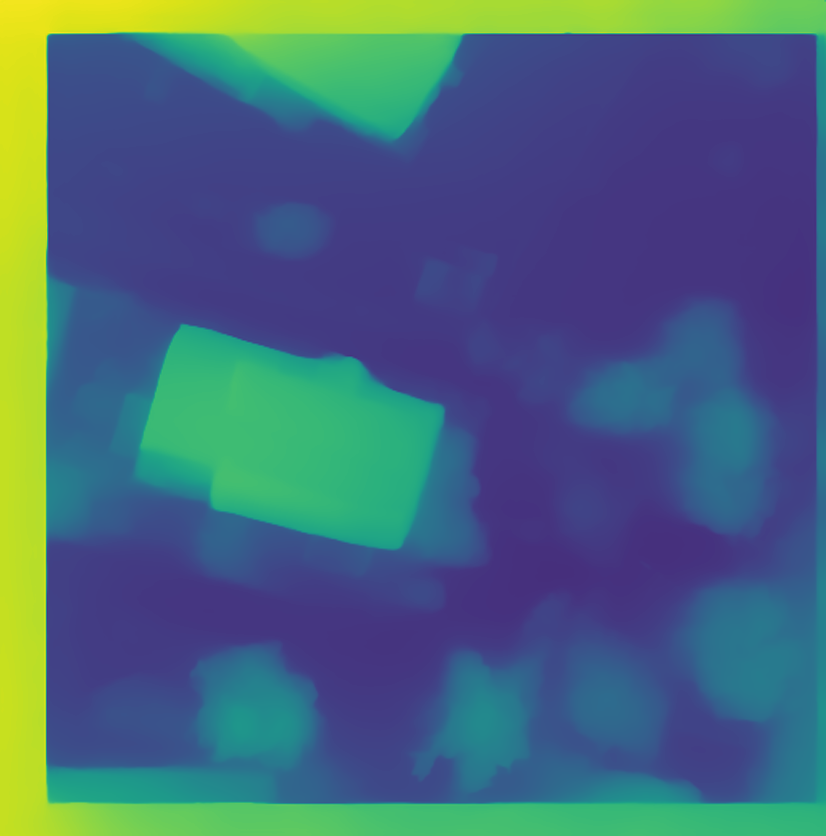

In [8]:
colored_depth_image

In [9]:


predicted_depth = predictions['predicted_depth']

depth_map = predicted_depth.squeeze().numpy()
height, width = depth_map.shape
x, y = np.meshgrid(np.arange(width), np.arange(height))
points = np.stack((x, y, depth_map), axis=-1).reshape(-1, 3)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

o3d.io.write_point_cloud("point_cloud.ply", pcd)
o3d.visualization.draw_geometries([pcd])


[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>